In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import cv2

import sys
sys.path.append('../scripts')
import util

In [2]:
def extractData(compressedBMP, cols):
    rows = int(len(compressedBMP)/cols)
    print("Rows: %d, Cols: %d" % (rows, cols))
    compressedBMP_np = np.ndarray((rows, cols), np.uint8, compressedBMP)
    print("[1] Max val: %d, mean val: %f" % (compressedBMP_np.max(), compressedBMP_np.mean()))
    
    uncompressedBMP_np = np.zeros((rows, cols*8), np.uint8)
    for i in range(rows-1):
        for j in range(cols-1):
            for x in range(0,8):
                uncompressedBMP_np[i, (j*8)+x] = (255 * ((compressedBMP_np[i,j] >> x) & 0x01))
    return uncompressedBMP_np

In [3]:
def plot_imgs(img_data_lst, color=False, interp='none', max_cols=3, fig_size=10):
    cnt=len(img_data_lst)
    r,c,n = cnt,cnt,1
    for idx, img_data in enumerate(img_data_lst):
        if idx % max_cols == 0:
            fig = plt.figure(figsize=(fig_size*r,fig_size*c))
        plt.subplot(r,c,idx+1)
        plt.imshow(img_data[0], interpolation=interp, cmap='gray',vmin=0,vmax=255)
        plt.title('%s' % (img_data[1])), plt.xticks([]), plt.yticks([])

In [4]:
files = [('nr2/20161024-193607_BitMap_6.dat','20161024-193607_BitMap_6-g2x4'), 
         ('nr2/20161024-193720_BitMap_7.dat','20161024-193720_BitMap_7-g2x8'),  
         ('nr2/20161024-193809_BitMap_8.dat','20161024-193809_BitMap_8-g2x12'),
         ('nr2/20161024-194006_BitMap_11.dat','20161024-194006_BitMap_11-g2x16'),
         ('nr2/20161024-194100_BitMap_12.dat','20161024-194100_BitMap_12-DNP 19nm Thin'), 
         ('nr2/20161024-194100_BitMap_13.dat','20161024-194100_BitMap_13-DNP 19nm Thin') ]

files2 =[('nr2/20161024-180229_BitMap_13.dat','20161024-180229_BitMap_13-g2x8'), 
         ('nr2/20161024-180239_BitMap_14.dat','20161024-180239_BitMap_14-g2x8'), 
         ('nr2/20161024-180239_BitMap_15.dat','20161024-180239_BitMap_15-g2x8'), 
         ('nr2/20161024-180808_BitMap_16.dat','20161024-180808_BitMap_16-g2x12'),  
         ('nr2/20161024-180818_BitMap_17.dat','20161024-180818_BitMap_17-g2x12'), 
         ('nr2/20161024-180818_BitMap_18.dat','20161024-180818_BitMap_18-g2x12'), 
         ('nr2/20161024-181400_BitMap_19.dat','20161024-181400_BitMap_19-g2x16'),
         ('nr2/20161024-181410_BitMap_20.dat','20161024-181410_BitMap_20-g2x16'), 
         ('nr2/20161024-181410_BitMap_21.dat','20161024-181410_BitMap_21-g2x16'),
         ('nr2/20161024-183827_BitMap_22.dat','20161024-183827_BitMap_22-g2x4'),
         ('nr2/20161024-183838_BitMap_23.dat','20161024-183838_BitMap_23-g2x4'), 
         ('nr2/20161024-183839_BitMap_24.dat','20161024-183839_BitMap_24-g2x4'), 
         ('nr2/20161024-183839_BitMap_25.dat','20161024-183839_BitMap_25-g2x4')]

In [38]:
uncompressedBMP_lst = []

for idx, file in enumerate(files2):
    with open(file[0], 'rb') as f:
        compressedBMP = f.read()
    uncompressedBMP_np = extractData(compressedBMP, 128)
    uncompressedBMP_lst.append( (uncompressedBMP_np, file[1]) )

Rows: 741, Cols: 128
[1] Max val: 34, mean val: 7.796432
Rows: 741, Cols: 128
[1] Max val: 34, mean val: 7.796432
Rows: 741, Cols: 128
[1] Max val: 34, mean val: 7.796432
Rows: 741, Cols: 128
[1] Max val: 130, mean val: 12.573887
Rows: 741, Cols: 128
[1] Max val: 130, mean val: 12.573887
Rows: 741, Cols: 128
[1] Max val: 130, mean val: 12.573887
Rows: 741, Cols: 128
[1] Max val: 32, mean val: 7.345142
Rows: 741, Cols: 128
[1] Max val: 32, mean val: 7.345142
Rows: 741, Cols: 128
[1] Max val: 32, mean val: 7.345142
Rows: 741, Cols: 128
[1] Max val: 170, mean val: 38.484185
Rows: 741, Cols: 128
[1] Max val: 170, mean val: 38.484185
Rows: 741, Cols: 128
[1] Max val: 170, mean val: 38.484185
Rows: 10, Cols: 128
[1] Max val: 255, mean val: 249.023438


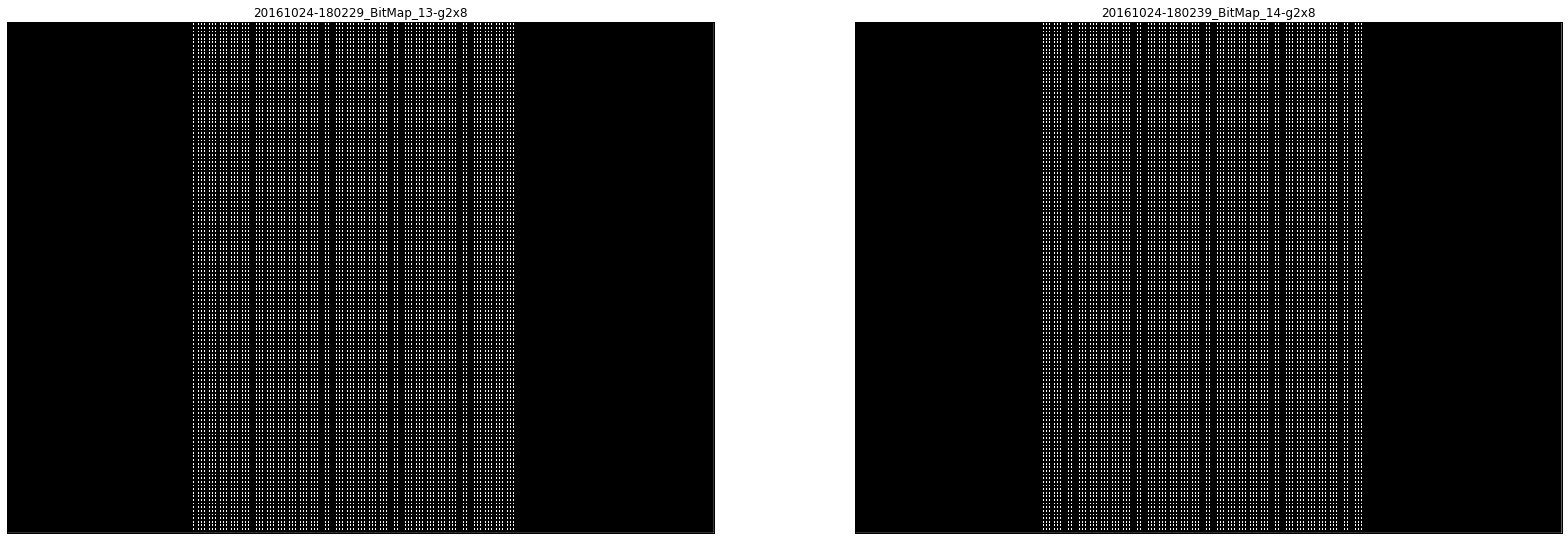

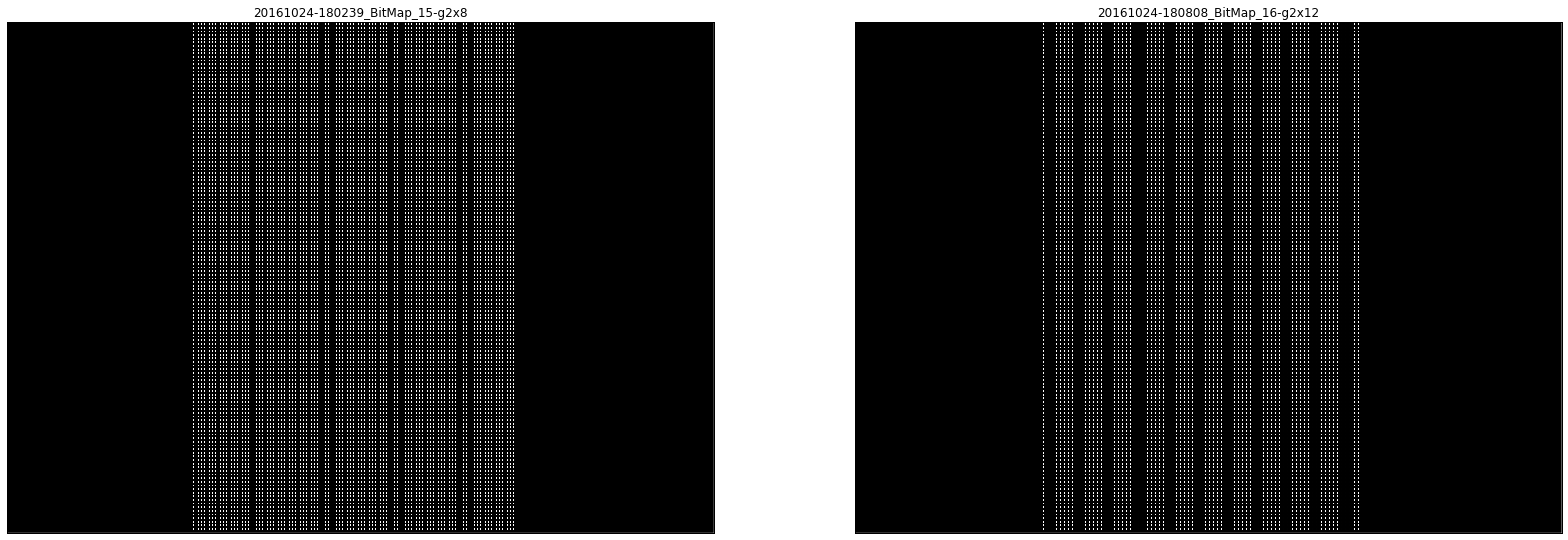

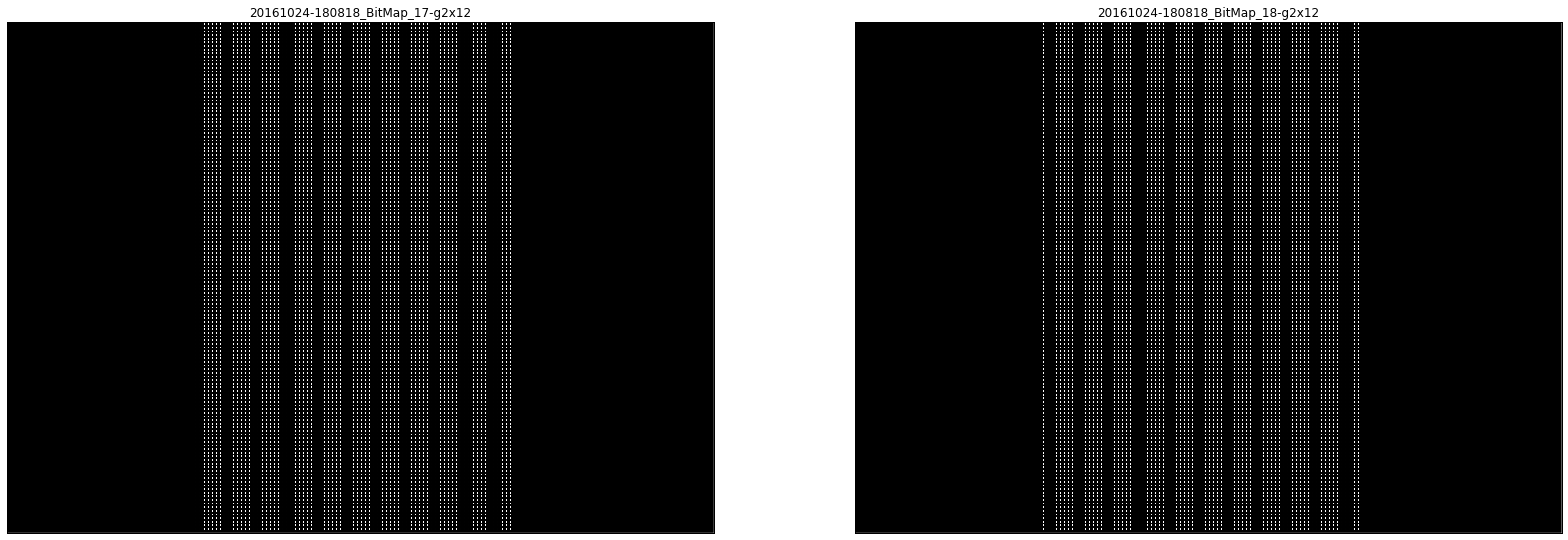

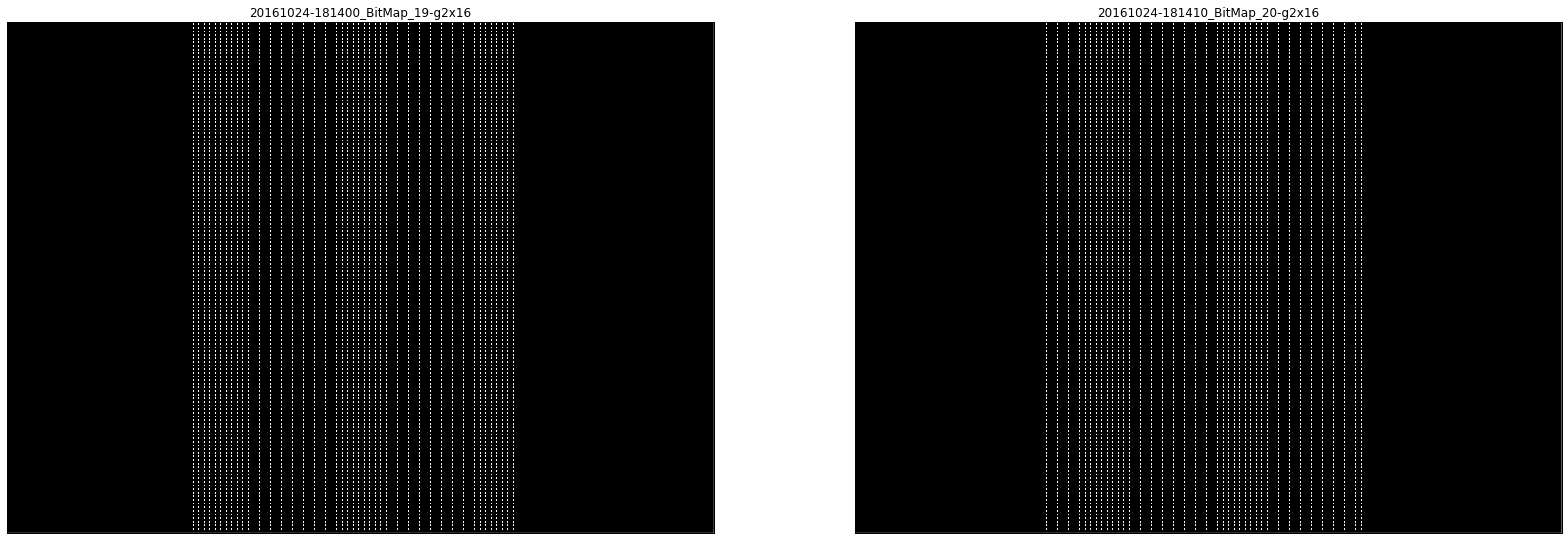

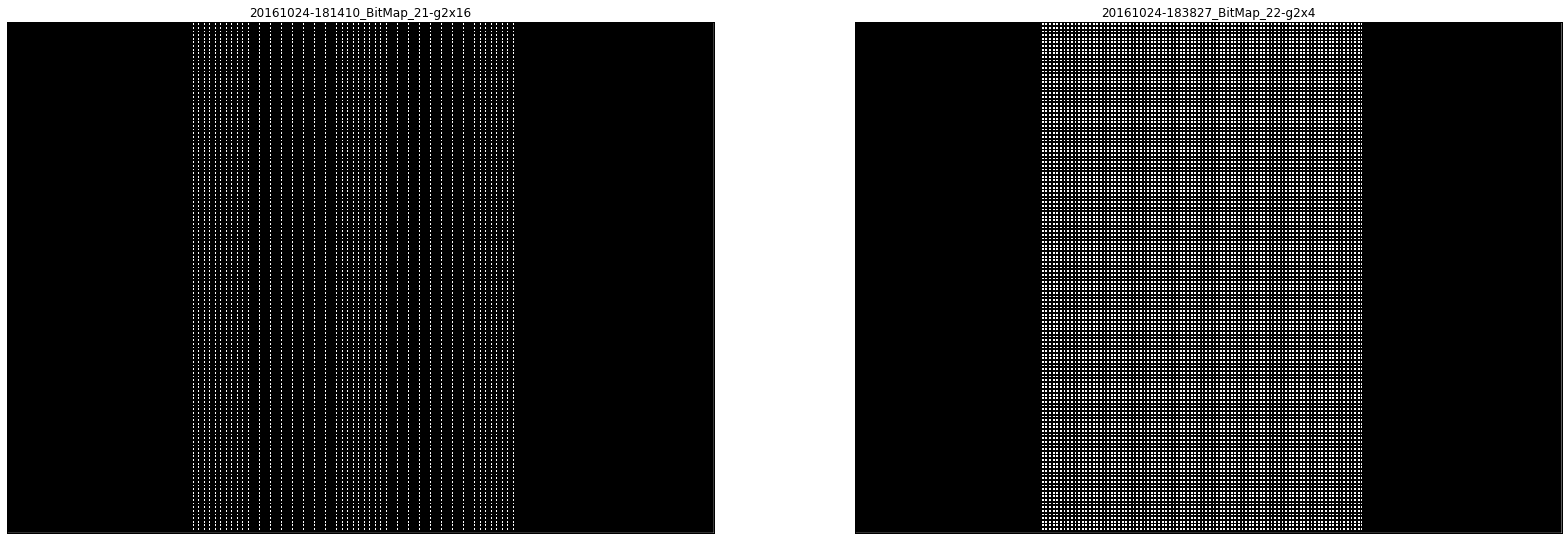

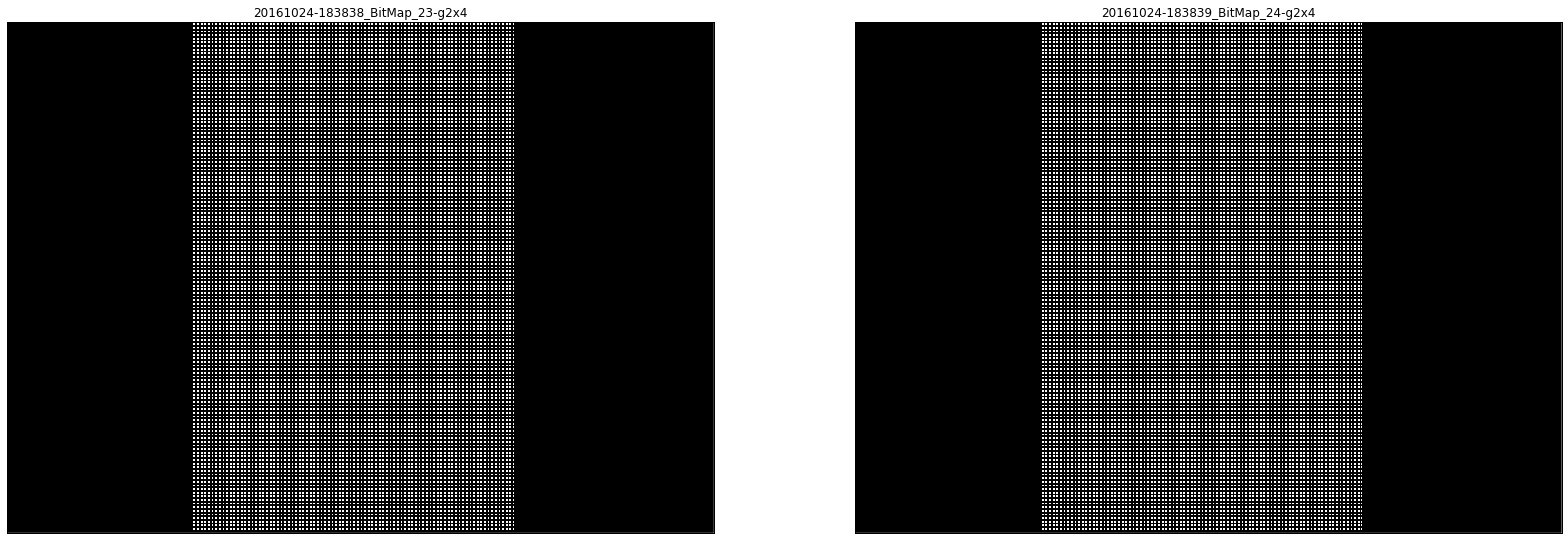

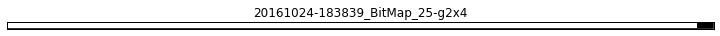

In [39]:
plot_imgs(uncompressedBMP_lst, max_cols = 2, fig_size=15)

In [9]:
rows, cols = uncompressedBMP_lst[0][0].shape
print(uncompressedBMP_lst[0][0].mean(axis=1).mean())
means = []
for row in range(rows):
    means.append(uncompressedBMP_lst[0][0][row].mean())
#delta = np.array(means).max() - np.array(means).min()

14.5088918586


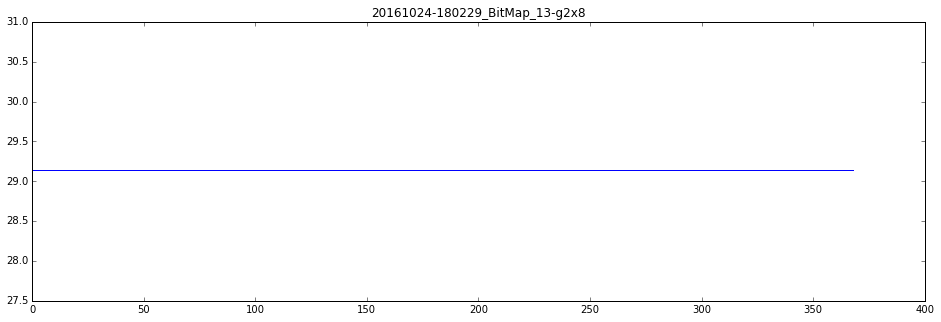

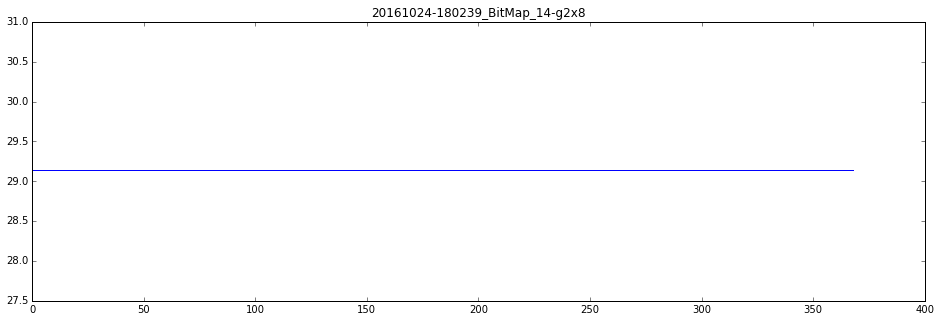

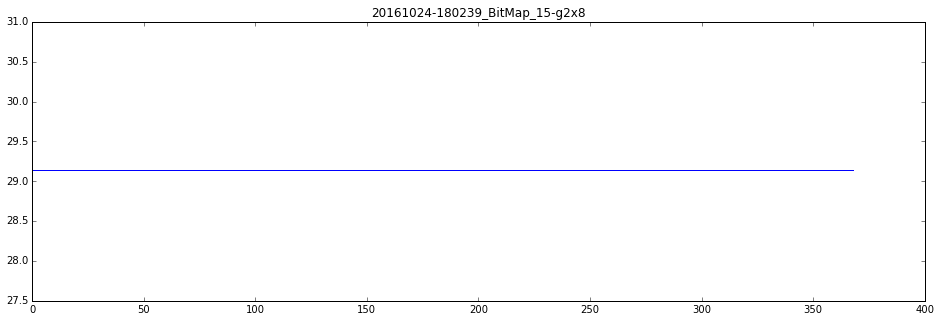

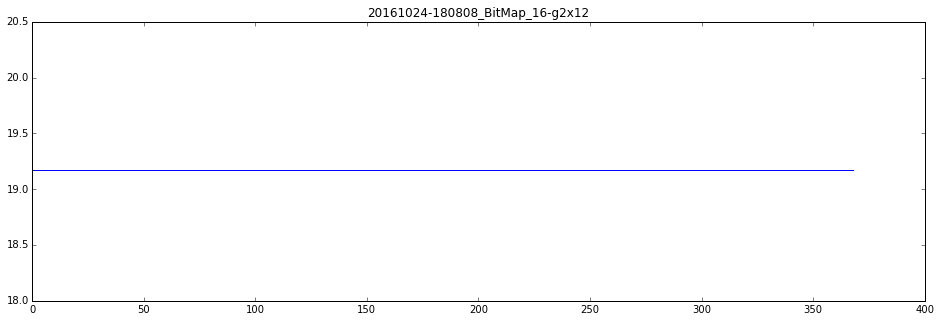

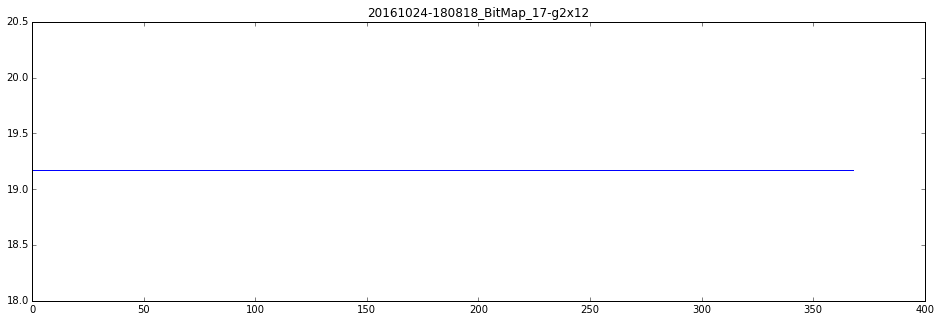

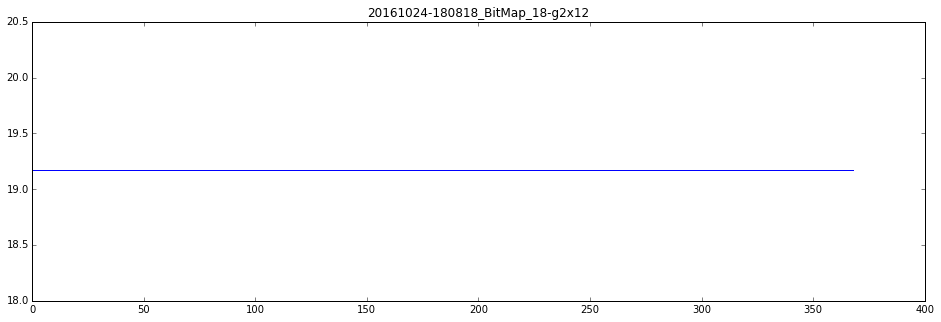

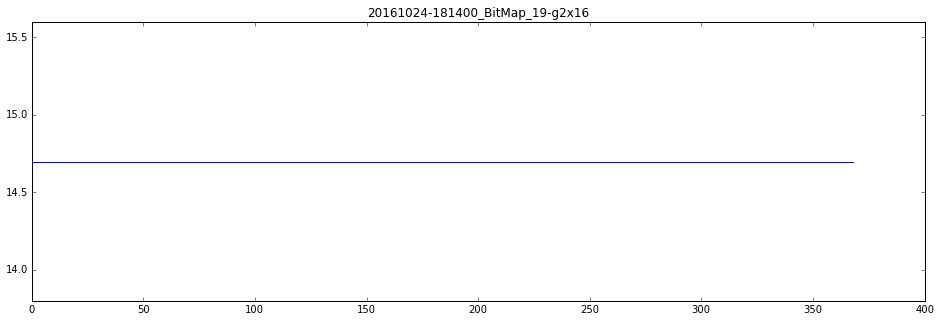

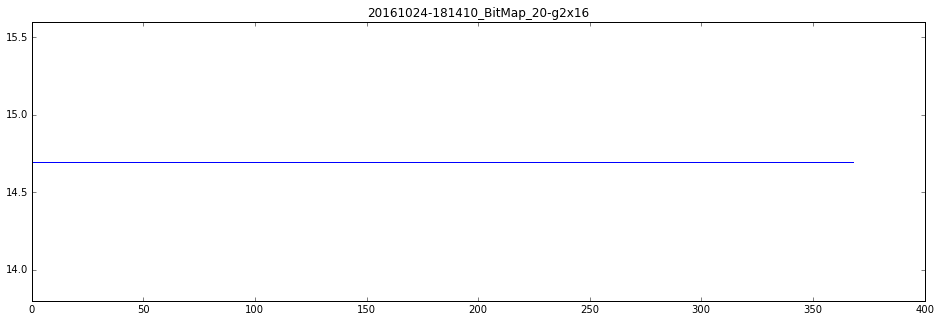

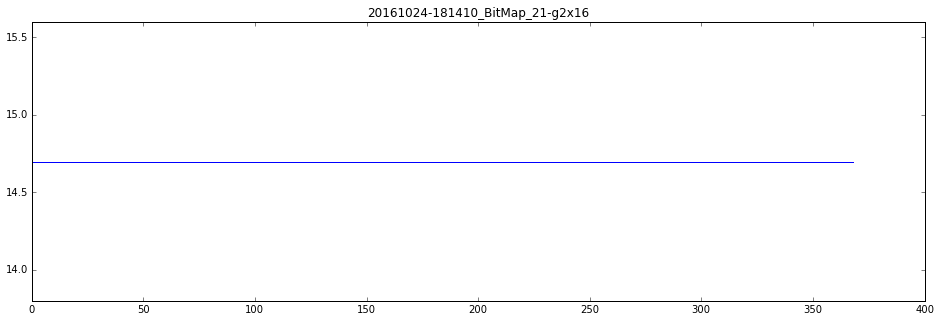

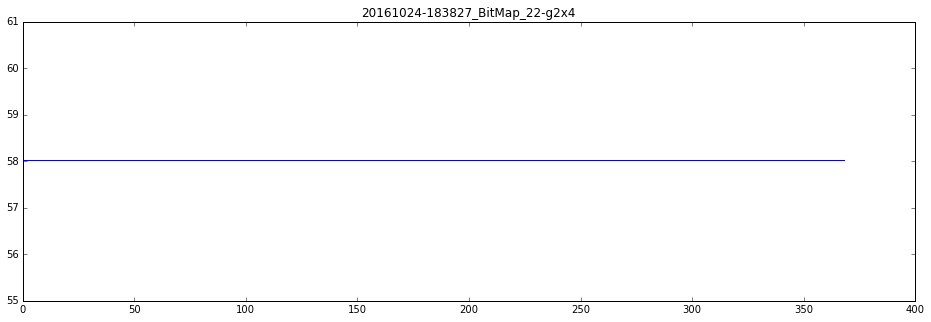

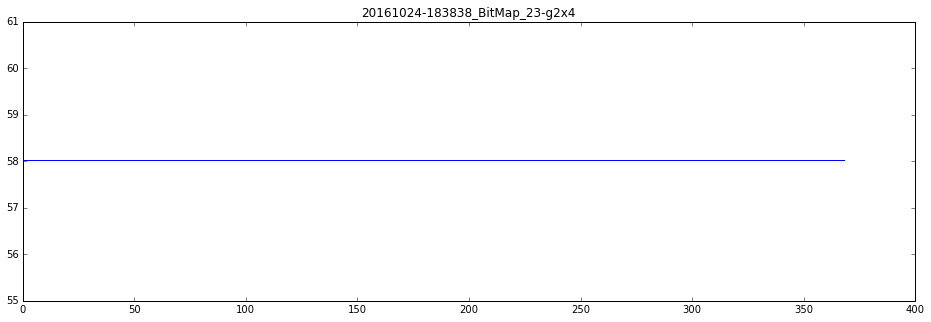

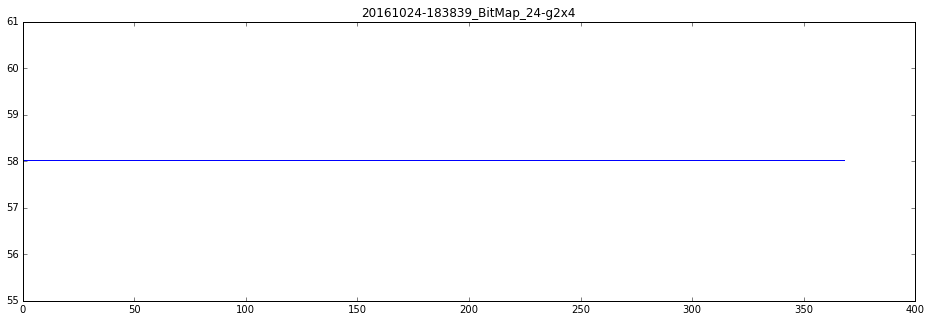

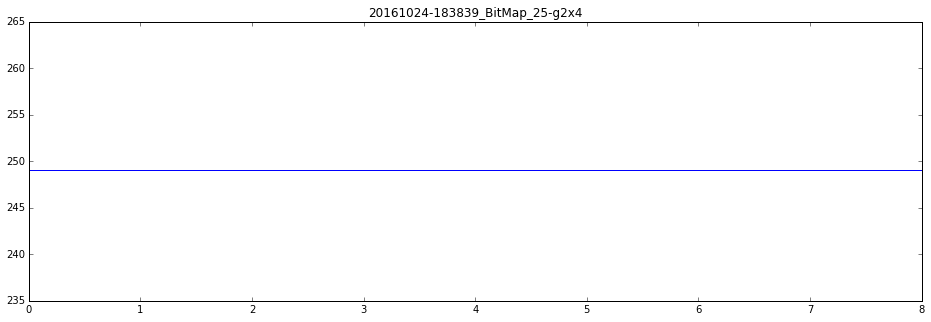

In [40]:
for uncompressedBMP in uncompressedBMP_lst:
    rows, cols = uncompressedBMP[0].shape
    means = []
    for row in range(rows):
        if uncompressedBMP[0][row].mean() > 0:
            means.append(uncompressedBMP[0][row].mean())
    means_np = np.array(means)
    plt.figure(figsize=(8*2,5))
    plt.plot(means, color='b')
    plt.title(uncompressedBMP[1])


In [49]:
from matplotlib.backends.backend_pdf import PdfPages
import datetime

pdf_file_name = 'NR2_ScorpionServer_data_plots.pdf'

data_to_plot_lst = []
for uncompressedBMP_data in uncompressedBMP_lst:
    rows, cols = uncompressedBMP_data[0].shape
    means = []
    for row in range(rows):
        if uncompressedBMP_data[0][row].mean() > 0:
            means.append(uncompressedBMP_data[0][row].mean())
            
    deltas = []
    for idx in range(len(means)-1):
        deltas.append(means[idx+1] - means[idx])
    data_to_plot_lst.append((np.array(deltas), uncompressedBMP_data[1]))

with PdfPages(pdf_file_name) as pdf:
    # set the file's metadata via the PdfPages object:
    d = pdf.infodict() 
    d['Title'] = u'NR2 ScorpionServer Data Plots'
    d['Author'] = u'Tom H. Rafferty / CNT'
    d['Subject'] = u'Data Plots For ScorpionServer image dumps'
    d['CreationDate'] = datetime.datetime.today()  # p3 uses datetime, p2 uses unicode str
    d['ModDate'] = datetime.datetime.today()       # p3 uses datetime, p2 uses unicode str
    
    # setup vars to control page layout
    num_plots = len(data_to_plot_lst)
    plots_per_page = 5
    num_pages = np.ceil(num_plots / plots_per_page)
    nb_pages = int(np.ceil(num_plots / float(plots_per_page)))
    grid_size = (plots_per_page, 1)
    
    print("Creating PDF (%s) with %d pages." % (pdf_file_name, num_pages))
    print("Total plots: %d, plots per page: %d" % (num_plots, plots_per_page))

    header_txt = 'NR2 ScorpionServer Image Data Plots\n(Flat lines means no data corruption)\n\n'
    for idx, data_to_plot in enumerate(data_to_plot_lst):        
        # Create a figure instance (ie. a new page) if needed
        if idx % plots_per_page == 0:
            print("New page: Adding plot %d of %d" % (idx+1, len(data_to_plot_lst))) 
            plt.figure(figsize=(8.27, 11.25), dpi=100)
            title = header_txt + data_to_plot[1]
        else:
            print("          Adding plot %d of %d" % (idx+1, len(data_to_plot_lst)))
            title = data_to_plot[1]

        plt.subplot2grid(grid_size, (idx % plots_per_page, 0))
        plt.plot(data_to_plot[0], color='b')
        plt.title(title)
        plt.ylim([-(data_to_plot[0].max()+5), data_to_plot[0].max()+5])
        plt.xlabel('Dispense Row Number (blank lines skiped)')
        plt.ylabel('Missing Drop\nIndication\n(0 = no missing)')

        # Close the page if needed
        if (idx + 1) % plots_per_page == 0 or (idx + 1) == num_plots:
            plt.tight_layout()
            pdf.savefig()  # saves the current figure into a pdf page
            plt.close()

Creating PDF (NR2_ScorpionServer_data_plots.pdf) with 3 pages.
Total plots: 13, plots per page: 5
New page: Adding plot 1 of 13
          Adding plot 2 of 13
          Adding plot 3 of 13
          Adding plot 4 of 13
          Adding plot 5 of 13
New page: Adding plot 6 of 13
          Adding plot 7 of 13
          Adding plot 8 of 13
          Adding plot 9 of 13
          Adding plot 10 of 13
New page: Adding plot 11 of 13
          Adding plot 12 of 13
          Adding plot 13 of 13


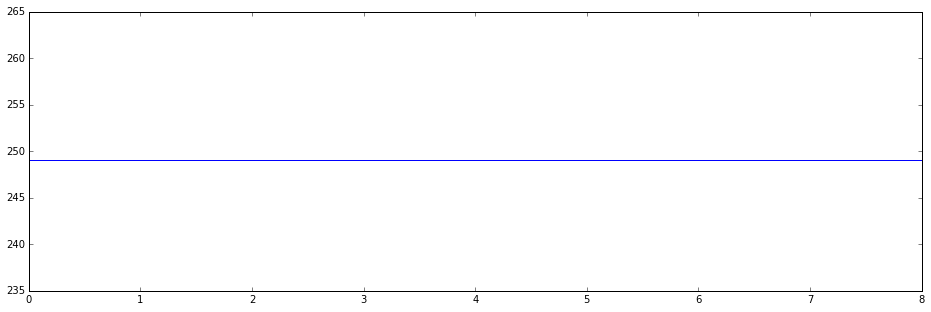

In [42]:
plt.figure(figsize=(8*2,5))
plt.plot(means, color='b')
#plt.plot(chan2[190:], color='g')
#plt.plot(chan3[190:], color='r')


In [23]:
for uncompressedBMP_data in uncompressedBMP_lst:
    fname = "nr2/" + uncompressedBMP_data[1] + ".bmp"
    cv2.imwrite(fname, uncompressedBMP_data[0])

In [ ]:
dst = cv2.add(uncompressedBMP_lst[0][0], uncompressedBMP_lst[1][0])
cv2.imwrite("1.bmp", uncompressedBMP_lst[0][0])
cv2.imwrite("2.bmp", uncompressedBMP_lst[1][0])
util.plot_imgs([(dst, 'dst')], max_cols = 2, fig_size=40)
cv2.imwrite("dst.bmp", dst)

In [ ]:
d = 0b10011101
d

In [ ]:
plt.savefig("tmp.png")

In [ ]:
for x in range(0,8):
    print("%d" % ((d >> x) & 0x01))

In [ ]:
'''
            Data_vec.push_back((data_int >> 24) & 0xFF);
            Data_vec.push_back((data_int >> 16) & 0xFF);
            Data_vec.push_back((data_int >> 8) & 0xFF);
            Data_vec.push_back(data_int & 0xFF);
'''
d2 = 0xd3456299
d2

In [ ]:
(d2 >> 24) & 0xff